## Representación señal ''Kadish cheese with chise is delicious''

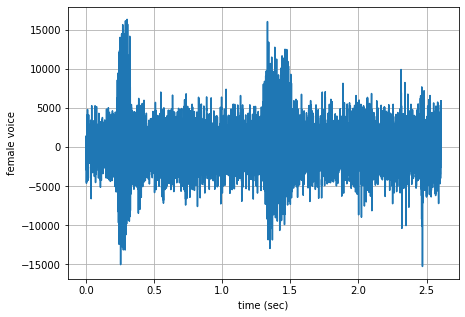

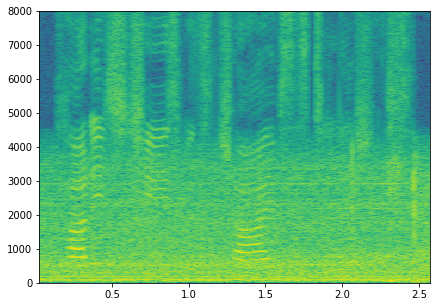

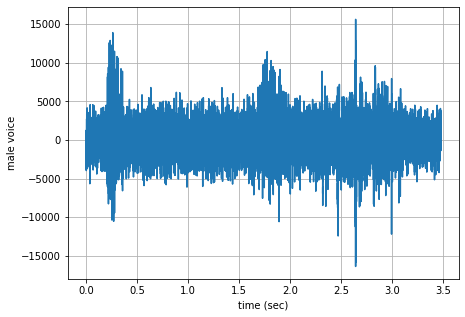

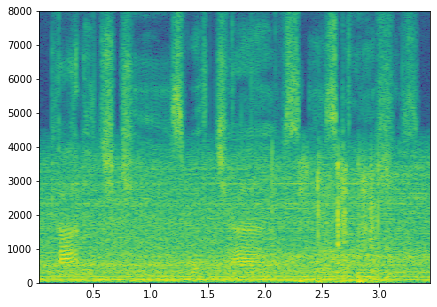

In [2]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as waves

#load female wav file
fs, s = waves.read('sf1_n1H.wav')
t = (np.arange(np.shape(s)[0])-1)/fs
plt.figure(figsize = (7,5))
plt.plot(t,s)
plt.grid()
plt.xlabel('time (sec)')
plt.ylabel('female voice')
plt.show()

#Espectrograma
plt.figure(figsize = (7,5))
Pxx, freqs, bins, im = plt.specgram(s, NFFT=1024, Fs=fs, noverlap=900)
plt.show()

#load male wav file
fs, s = waves.read('sm1_n1H.wav')
t = (np.arange(np.shape(s)[0])-1)/fs
plt.figure(figsize = (7,5))
plt.plot(t,s)
plt.grid()
plt.xlabel('time (sec)')
plt.ylabel('male voice')
plt.show()

#Espectrograma
plt.figure(figsize = (7,5))
Pxx, freqs, bins, im = plt.specgram(s, NFFT=1024, Fs=fs, noverlap=900)
plt.show()

## Función densidad de probabilidad exponencial

In [ ]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as waves
import math
from scipy import stats
from scipy.stats import expon

x = np.arange(0,30.01,0.1)
p = expon.pdf(x, loc=0, scale=5)
plt.figure(figsize = (7,5))
plt.grid()
plt.plot(x,p)
plt.title('Exponential pdf')

#Exponencial con generación de números aleatorios
rv = expon.rvs(scale=5, size=5000) # Genera números aleatorios distribuidos exponencialmente
plt.figure(figsize = (7,5))
plt.hist(rv, 25, color='#0504aa', alpha=0.7, rwidth=0.85)
plt.title('Histograma Exponencial')
plt.show()

#Probabilidad de que un aparato electrónico sobreviva más de 6 años
a = expon.sf(6,loc=0,scale=5) #Calcula P(X>6)y lo guarda en a
resultado = a
print(resultado)

#fdp vs histograma
N = 5000
rv = expon.rvs(scale=5, size=N)
cuenta, cajas, ignorar = plt.hist(rv, 100, color='#0504aa', alpha=0.7, rwidth=0.85)


dx = cajas[1]-cajas[0]
area = np.sum(np.dot(N,dx))

plt.figure(figsize = (7,5))
plt.bar(cajas[0:-1], cuenta/area, label='histograma')
plt.plot(x,p,'r',lw=2.5, label='pdf')
plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.show()

## Funciones densidad de probabilidad prácticas

In [ ]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as waves
import math
from scipy.stats import expon, norm, uniform


## fdp exponencial
x = np.arange(0,30.01,0.1)
mu_exp = 5
p = expon.pdf(x, loc=0, scale=mu_exp)
plt.figure(figsize = (7,5))
plt.plot(x,p)
plt.title('Exponential pdf')

## fdp normal o gaussiana
x = np.arange(-30.01,30.01,0.1)
mu, sigma = 0, 1 # media y desvio estandar
datos = norm.pdf(x,mu,sigma) #creando muestra de datos
plt.figure(figsize = (7,5))
plt.plot(x,datos)
plt.title('Gaussian normal pdf')

## fdp uniforme
N = 100
a, b = 2, 4 # parámetros a y b de la uniforme
x = np.random.uniform(a,b,N)
fx = np.dot(1/(b-a),np.ones(N))
plt.figure(figsize = (7,5))
count, bins, ignored = plt.hist(x, 25, density=True)
plt.plot(x, fx, linewidth=2, color='r')
plt.title('Uniform pdf')

## Gaussiana multidimensional

In [ ]:
# %matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
import math
from scipy.stats import expon, norm, uniform

N = 100
mx = [1,2]
mx = np.asarray(mx)  #Vector de medias
Cx = [[1,0], [0,1]]
Cx = np.asarray(Cx) #Matriz de covarianza
Cxi = np.linalg.inv(Cx)

#Definición del grid
x1 = np.linspace(-2,4,N)
x2 = np.linspace(-1,5,N)
[X,Y] = np.meshgrid(x1,x2)

#Definición pdf
cte = (1/(2*math.pi*np.linalg.det(Cx)**(1/2)))
expo = Cxi[0,0]*(X-mx[0])**2 + Cxi[1,1]*(Y-mx[1])**2 + (Cxi[0,1] + Cxi[1,0])*(X-mx[0])*(Y-mx[1])
f = cte * np.exp(-expo / 2)

# f = np.zeros((expo.shape[0],expo.shape[1]))
# for i in range(expo.shape[0]):
#     for j in range(expo.shape[1]):
#         f[i][j] = cte * math.exp(-0.5*expo[i][j])


#Plotting
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, f, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)
cset = ax.contourf(X, Y, f, zdir='z', offset=-0.15, cmap=cm.viridis)
plt.show()

#Contour
plt.figure()
plt.contour(X, Y, f)
plt.show()
